In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Training

In [0]:
def detect_outliers(data):
    outliers = []
    threshold=3
    mean = np.nanmean(data.price.values)
    std =np.nanstd(data.price.values)
    
    for index, row in data.iterrows():
        y = row['price']
        z_score = (y - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(index)
    return outliers

In [0]:
#reading data
data= pd.read_csv("drive/My Drive/FYP/Data/ads_fact_500000_transformed.csv", engine='python', encoding='utf-8', error_bad_lines=False)
data = data.drop(['badge'],axis=1)
data = data.drop(['coordinates'],axis=1)
data = data.drop(['date_time'],axis=1)
#removing NaNs
data[['badge_transformed']] = data[['badge_transformed']].fillna("")
print (data)

           ad_id  make_id  ...  datetime_year  datetime_month
0       73919640       34  ...           2019               7
1       73919652        8  ...           2019               7
2       73919677        8  ...           2019               7
3       73919705       66  ...           2019               7
4       73919723       81  ...           2019               7
...          ...      ...  ...            ...             ...
499995  93031487       86  ...           2019              11
499996  93031488       53  ...           2019              11
499997  93031587       29  ...           2019              11
499998  93032161       93  ...           2019              11
499999  93032179       29  ...           2019              11

[500000 rows x 22 columns]


In [0]:
data.columns.values

array(['ad_id', 'make_id', 'model_id', 'fuel_type_id', 'body_type_id',
       'source_id', 'state_id', 'year', 'km_driven', 'image', 'url',
       'price', 'title', 'hash', 'city', 'duplicate', 'click_count',
       'ad_status', 'badge_transformed', 'coordinates2city',
       'datetime_year', 'datetime_month'], dtype=object)

In [0]:
outliers = detect_outliers(data)
print(outliers)
print(len(outliers))
data = data.drop(outliers)

[204906, 257995, 264253, 311924, 315315, 376419, 407596, 436111, 488835]
9


In [0]:
le_badge_transformed = preprocessing.LabelEncoder()
data.loc[:,"badge_transformed"] = le_badge_transformed.fit_transform(list(np.array(data.badge_transformed)))

filename = open('drive/My Drive/FYP/Models/LE01-badge_transformed.pkl','wb')
pickle.dump(le_badge_transformed, filename)
filename.close()

le_coordinates2city = preprocessing.LabelEncoder()
data.loc[:,'coordinates2city'] = le_coordinates2city.fit_transform(list(np.array(data.coordinates2city)))

filename = open('drive/My Drive/FYP/Models/LE01-coordinates2city.pkl','wb')
pickle.dump(le_coordinates2city, filename)
filename.close()

In [0]:
data=data.drop(['ad_id', 'source_id', 'state_id', 'city', 'image',  'url', 'hash', 'click_count', 'title', 'duplicate', 'ad_status'],axis=1)

In [0]:
data.columns.values

array(['make_id', 'model_id', 'fuel_type_id', 'body_type_id', 'year',
       'km_driven', 'price', 'badge_transformed', 'coordinates2city',
       'datetime_year', 'datetime_month'], dtype=object)

In [0]:
print(data)

        make_id  model_id  ...  datetime_year  datetime_month
0            34      1500  ...           2019               7
1             8      1519  ...           2019               7
2             8      1519  ...           2019               7
3            66      1547  ...           2019               7
4            81      1514  ...           2019               7
...         ...       ...  ...            ...             ...
499995       86      1798  ...           2019              11
499996       53      1785  ...           2019              11
499997       29      1540  ...           2019              11
499998       93      1749  ...           2019              11
499999       29      1503  ...           2019              11

[499991 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


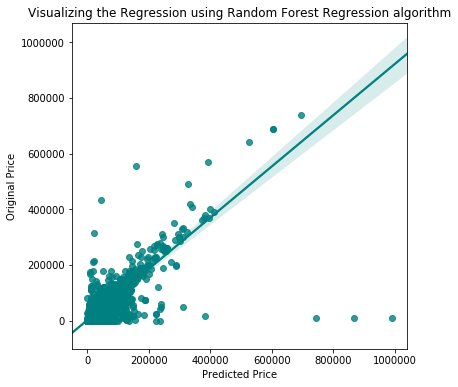

Mean Absolute Error is : 2020.4331668130492
 — — — — — — — — — — — — — — — — — — — — — — —
Mean Squared Error is : 58706291.57954524
— — — — — — — — — — — — — — — — — — — — — — — 
The R2 square value of RandomForest Regressor is : 83.75830062428274
— — — — — — — — — — — — — — — — — — — — — — — 


In [0]:
y = data.price
X = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
sns.regplot(pred, y_test, color = "teal")
plt.xlabel("Predicted Price")
plt.ylabel("Original Price")
plt.show()

print("Mean Absolute Error is :", mean_absolute_error(y_test, pred))
print(" — — — — — — — — — — — — — — — — — — — — — — —" )
print("Mean Squared Error is :", mean_squared_error(y_test, pred))
print("— — — — — — — — — — — — — — — — — — — — — — — ")
print("The R2 square value of RandomForest Regressor is :", r2_score(y_test, pred)*100)
print("— — — — — — — — — — — — — — — — — — — — — — — ")

In [0]:
#Better results with random forest regressor

In [0]:
y = data.price
X = data.drop('price', axis=1)

from sklearn.model_selection import KFold
model = RandomForestRegressor()
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print("scores: ", scores)
print("accuracy: ", np.mean(scores))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


scores:  [0.843586312999023, 0.8219170368554071, 0.8770696944792313, 0.8965529578040522, 0.9264351250617914, 0.8813948414635722, 0.9066310321634924, 0.7700031445034172, 0.8434186494706777, -0.05250113148626978]
accuracy:  0.7714507663314395


In [0]:
#save the model to disk
filename = 'drive/My Drive/FYP/Models/M01-RandomForestRegressor.sav'
pickle.dump(model, open(filename, 'wb'))

### Inference

In [0]:
#load the model from disk
filename = 'drive/My Drive/FYP/Models/M01-RandomForestRegressor.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [0]:
pip install reverse-geocode

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4-cp36-none-any.whl size=1637801 sha256=6559f03aaa6e77c49862b15886995449b889ba33f93a24d6bde68597dc71cdab
  Stored in directory: /root/.cache/pip/wheels/80/56/82/529b8b1d91c1ef49fe335d89d61bc4d244b6ed72c5063c55e9
Successfully built reverse-geocode


In [0]:
import reverse_geocode

In [0]:
#load the label encoders from disk

#pkl_file_badge = open('drive/My Drive/FYP/Models/LE01-badge_transformed.pkl', 'rb')
#le_badge_transformed = pickle.load(pkl_file_badge) 
#pkl_file_badge.close()

#pkl_file_coordinates = open('drive/My Drive/FYP/Models/LE01-coordinates2city.pkl', 'rb')
#le_coordinates2city = pickle.load(pkl_file_coordinates) 
#pkl_file_coordinates.close()

make_id = 8
model_id = 1502
badge_transformed = int(le_badge_transformed.transform(['ST'])[0])
fuel_type_id = 1
body_type_id = 3
year = 2016
km_driven = 64967
coordinates = (-34.9285, 138.6007),
coordinates2city = reverse_geocode.search(coordinates)[0]['city']
coordinates2city = int(le_coordinates2city.transform([coordinates2city])[0])
datetime_year = 2019
datetime_month = 9

https://www.carsales.com.au/cars/details/2016-nissan-pathfinder-st-r52-auto-2wd-my16/OAG-AD-17689758/

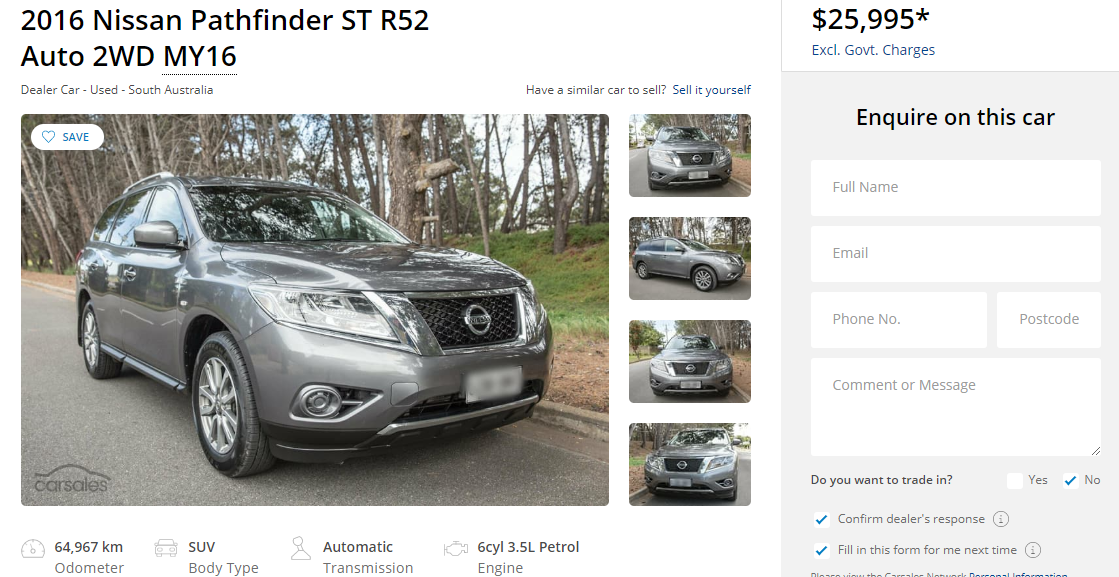

In [0]:
pred = loaded_model.predict(np.array([make_id, model_id, fuel_type_id, body_type_id, year, km_driven, badge_transformed, coordinates2city, datetime_year, datetime_month]).reshape(1,-1))
print("Predicted price: $", pred[0])

Predicted price: $ 25553.3


In [0]:
make_id = 66
model_id = 1582
badge_transformed = int(le_badge_transformed.transform(['AMBIENTE4X45SEAT'])[0])
fuel_type_id = 1
body_type_id = 1
year = 2013
km_driven = 61399
coordinates = (-33.8688, 151.2093),
coordinates2city = reverse_geocode.search(coordinates)[0]['city']
coordinates2city = int(le_coordinates2city.transform([coordinates2city])[0])
datetime_year = 2019
datetime_month = 1

https://www.carsales.com.au/cars/details/2013-ford-focus-ambiente-lw-mkii-auto/OAG-AD-18168691

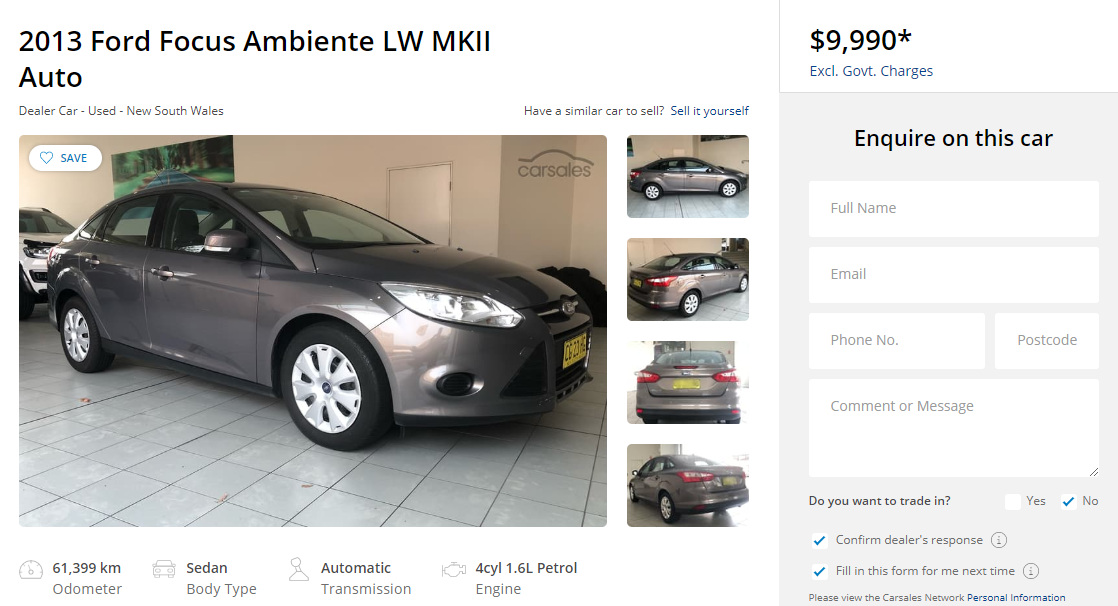

In [0]:
pred = loaded_model.predict(np.array([make_id, model_id, fuel_type_id, body_type_id, year, km_driven, badge_transformed, coordinates2city, datetime_year, datetime_month]).reshape(1,-1))
print("Predicted price: $", pred[0])

Predicted price: $ 8016.8
